Iteration 1, Center shift: 4.5030
Iteration 2, Center shift: 2.1962
Iteration 3, Center shift: 0.7698
Iteration 4, Center shift: 0.0000
Convergence reached!


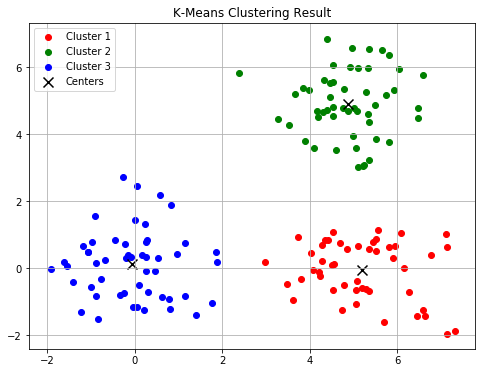

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Generate sample data (you can replace this with your own data)
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=(5,5), scale=1.0, size=(50, 2)),
    np.random.normal(loc=(0,0), scale=1.0, size=(50, 2)),
    np.random.normal(loc=(5,0), scale=1.0, size=(50, 2))
])

# Step 2: Initialize K means
k = 3  # Number of clusters
centers = X[np.random.choice(X.shape[0], k, replace=False)]  # Random initial centers

def distance(a, b):
    return np.linalg.norm(a - b)

def assign_clusters(X, centers):
    clusters = [[] for _ in range(k)]
    for point in X:
        distances = [distance(point, center) for center in centers]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    return clusters

def update_centers(clusters):
    return np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centers[idx] 
                     for idx, cluster in enumerate(clusters)])

max_iters = 100
tol = 1e-4

for i in range(max_iters):
    clusters = assign_clusters(X, centers)
    new_centers = update_centers(clusters)
    shift = np.linalg.norm(new_centers - centers)
    print(f"Iteration {i+1}, Center shift: {shift:.4f}")
    if shift < tol:
        print("Convergence reached!")
        break
    centers = new_centers

# Plot final clusters
colors = ['r', 'g', 'b']
plt.figure(figsize=(8,6))
for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if cluster.size > 0:
        plt.scatter(cluster[:,0], cluster[:,1], c=colors[idx], label=f'Cluster {idx+1}')
plt.scatter(centers[:,0], centers[:,1], c='k', marker='x', s=100, label='Centers')
plt.title('K-Means Clustering Result')
plt.legend()
plt.grid(True)
plt.show()
